# Gradijentni spust

## Gradijentni spust: Uvod i ideja

Gradijentni spust *(engl. Gradient descent)* je generenički optimizacijski algoritam koji je ustanju pronaći optimalna rješenja za različiti broj problema. Temeljna ideja gradijentnog spusta jest iterativnim postupkom mijenjati parametre s ciljem minimiziranja (ili maksimiziranja) funkcije cijene.

Pojednostavljena ideja iza gradijentnog spusta leži u činjenici da funkciju cijene možemo skicirati kao "brda i doline" gdje tražimo najnižu moguću točku u koju možemo doći iz trenutne pozicije. Primjer funkcije cijene srednje kvadratne pogreške za linearnu regresiju može se vidjeti na sljedećoj slici:

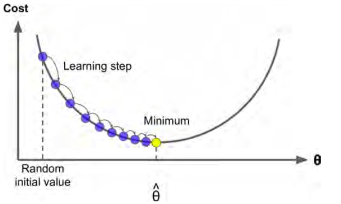


Na samom početku nasumično se odrede vrijednosti parametra $\Theta$ *(engl. random initialisation)* po kojem je funkcija cijene parametrizirana. U svakoj od sljedećih iteracija mijenjamo parametar $\Theta$ na takav način da se pomičemo niz gradijent (prva derivacija funkcije cijene). Drugim riječima, izračun gradijenta daje nam smjer u kojem se nalazi "bolje" rješenje od onog trenutnog. Kako bi se odredila veličina "koraka" u smijeru ka boljem rješenju, uvodi se hiperparametar stope učenja $\alpha$ *(engl. learning rate)*. 

Određivanje stope učenja $\alpha$ u izvornom algoritmu gradijentnog spusta provodi se empirijski (tako da postoji iskustvo na sličnom problemu), ili eksperimentalno koristeći metodu poput [grid-search algoritma](https://en.wikipedia.org/wiki/Hyperparameter_optimization). 

Uzrok premale stope učenja rezultira da je konvergencija ka rješenju veoma spora, a ako je model limitiran brojem koraka, postoji mogućnost da model ne uspije naučiti optimalne vrijednost parametra theta. Jedan primjer premale stope učenja može se vidjeti na slici:

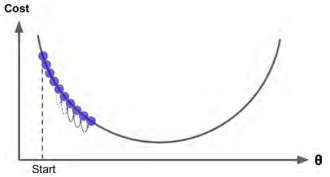

Opozitno prethodnom problemu jest prevelika stopa učenja koji uzrokuje divergenciju, odnosno model "preskoči" optimalne parametre. Primjer ovakve stope učenja nalazi se na slici:

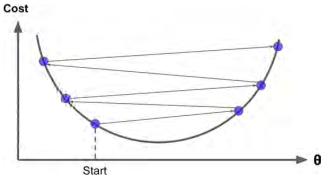




## Pseudokod gradijentnog spusta

Originialni pseudokod za gradijentni spust jest sljedeći:

<div class="alert alert-block alert-info">
$\alpha = r; (r \in \mathbb{R})$

$\text{while(convergence)} \{ $

$\quad\Theta_{n+1} = \Theta_n - \alpha\cdot\bigtriangledown_\Theta J(\Theta) \}$

</div>

gdje $\alpha$ označva stopu učenja (tipično realni broj u intervalu $0 \leq \alpha \leq 1$, uvijet $\text{"convergence"}$ može biti broj epoha (iteracija) ili preciznost modela bilo na trening setu gdje počne stagnirati, ili na cross-validacijskom setu gdje se počne povećavati i $J(\Theta)$ je funkcija cijene koja se optimizira. 


## Tipovi gradientnog spusta
Postoji mnogo različitih tipova gradientnog spusta. Svaki od njih donosi poneko poboljšanje u odnosno na prethodnog ali ne znači nužno da je jedan tip gradijentnog spusta najbolji, odnosno i ovdje se može primjeniti *"no free lunch theorem"*. U ovom radu objasniti će se pobliže sljedeći tipovi gradientnog spusta:

* Gradient Descent

* AdaGrad

* Momentum Optimization

* RMSProp 

* Adam


#### Gradient descent optimizacija
Osnovni **gradent descent** opisan je prethodno u ovoj skripti. Dakle, gradient descent je iterativni optimizacijski algoritam prvog stupnja koji u svakoj iteraciji čini korak proporcionalan negativu gradijenta (ili procjene gradijenta) funkcije cilja u trenutnoj točki.

Formula po kojoj se gradient descent računa jest:

$\quad\Theta_{n+1} = \Theta_n - \alpha\cdot\bigtriangledown_\Theta J(\Theta) $

Paramtar koji se mora zadati kada se koristi gradient descent jest:

* $\alpha$ - stopa učenja (engl. learning rate) koji kaže za koliko se prilikom svakog koraka ažuriraju parametri

#### AdaGrad optimizacija
Ukoliko zamislimo problem u kojem funkcija cilja izgleda kao izdužena zdijela, tada će gradient descent krenuti vrlo brzo prema globalnom optimumu, a potom zbog malog gradijenta će usporiti i napredovati izrazito sporo. AdaGrad verzija gradijentnog spusta riješava ovaj problem uvođenjem adaptivne stope učenja. Adaptivna stopa učenja se ostvaruje skaliranjem gradijentnog vektora. 

Formula po kojoj se AdaGrad računa jest:

1. $\quad s \leftarrow s +  \bigtriangledown_\Theta J(\Theta) \otimes \bigtriangledown_\Theta J(\Theta) $

2. $\quad\Theta_{n+1} = \Theta_n - \alpha\cdot\bigtriangledown_\Theta J(\Theta) \oslash \sqrt{s + \epsilon} $

Parametari u formuli su sljedeći:

* $\alpha$ - stopa učenja *(engl. learning rate)* koji kaže za koliko se prilikom svakog koraka ažuriraju parametri
* $\epsilon$ - jako mali broj tipično $10^{-8}$ kako bi se izbjeglo dijeljenje sa $0$

Primjetite kako se vektor $s$ zapravo računa $s_i \leftarrow s_i + (\frac{\delta}{\delta \Theta_iJ(\Theta)})^2$, odnosno vektor $s$ akumulira kvadrate parcijalnih derivacija funkcije cijene u ovisnosti o parametru $\Theta$. Drugi korak je identičan gradijentnom spustu uz jednu razliku koja se očituje u djeljenju gradijenta sa korjenom vektora $s$ pribrojnog s konstantom $\epsilon$. Drugim riječima na ovaj način se veliki gradijent zadržava i prolongira dulje u izračunu, odnosno on se raspada (*engl. decay*). 

Prikaz usporedebe AdaGrad algoritma i Gradient Descent-a na jednostavnom problemu regresije:

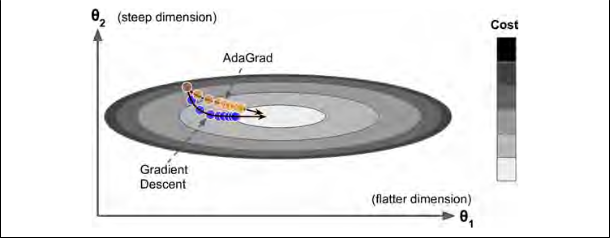

AdaGrad često ima dobre performanse na jednostavnim kvadratnim problemima, ali na treniranju neuronskih mreža često se zaustavi prebrzo jer se stopa učenja smanji da razine kada više nema napretka (u potpunosti se raspadne). Stoga se AdaGrad ne koristi često u neuronskim mrežama.

### RMSProp
AdaGrad je patio od problema prebrzog usporavanja rezultirajući nemogućnošću pronalaženja globalnog optimuma. RMSProp algoritam popravlja ovaj problem tako da akumulira samo gradijente nekoliko prošlih iteracija (a ne sve od početka). 

Efekt akumuliranja postiže se raspadom gradijenta što je vidljivo iz formula:

1. $\quad s \leftarrow \beta \cdot s + (1-\beta)\cdot \bigtriangledown_\Theta J(\Theta) \otimes \bigtriangledown_\Theta J(\Theta)$
2. $\quad\Theta_{n+1} = \Theta_n - \alpha\cdot\bigtriangledown_\Theta J(\Theta) \oslash \sqrt{s + \epsilon} $

Parametri u formulama su sljedeći:
* $\alpha$ - stopa učenja *(engl. learning rate)* koji kaže za koliko se prilikom svakog koraka ažuriraju parametri.
* $\beta$ - stopa raspada *(engl. decay)* koji se tipično postavlja na vrijednost $0.9$ te često puta nema potrebe za njegovim mijenjanjem.
* $\epsilon$ - jako mali broj tipično $10^{-8}$ kako bi se izbjeglo dijeljenje sa $0$.


Osim na vrlo jednostavnim problemima, RMSProp će gotovo uvijek ostvariti bolje performanse nego li AdGrad. Također brži konvergira od Momentum optisation algoritma. Drugim riječima, do pojave Adam optimizacije bio je preferirani optimiator da treniranje neuronskih mreža.

### Momentum Optimisation
Ideja iza Mommentum Optimisation algoritma leži u brzini kotrljanja, naime, ako se kugla kotrlja niz padinu, ona dobiva na brzini. Na sličan način može se promatrati i gradijentni spust: uzevši u obzir prethodne vrijednosti gradijenata stvara se brzina spuštanja u kojoj trenutni gradijent služi samo kao akceleracija. 

Pretočivši navedeno u formule, one glase:

1. $\quad m_{n+1} \leftarrow \beta \cdot m_{n} + \alpha\cdot\bigtriangledown_\Theta J(\Theta_n) $

2. $\quad \Theta_{n+1} = \Theta_{n} - m_{n+1}$

Parametri u formuli su sljedeći:

* $\alpha$ - stopa učenja *(engl. learning rate)* koji kaže za koliko se prilikom svakog koraka ažuriraju parametri
* $\beta$ - momentum *(engl. momentum)* koji se postavlja na vrijednost $0 \leq \beta \leq 1$. $\beta$ označava trenje i tipična vrijednost mu je $0.9$ ($0.9999$ za velike setove podataka)
* $m$ - momentum vektor koji označava akumuliranu akceleraciju (gradijent) za koji se parametri ažuriraju.

Ideja je da vektor $m$ predstavlja brzinu spusta dok gradijent zapravo određuje akceleraciji. Rezultat ovakvog pristupa jest da se brzina napretka zadržava i na platoima što omogućuje izlazak iz lokalnih optimuma i napredak kroz područja "malog nagiba" veoma brzo (za razliku od osnovnog algoritma gradijentnog spusta).

U dubokim neuronskim mrežama koje ne koriste *batch normalisation*, gornji slojevi mogu često sadržavati ulazne podatke različitih skala. Konvergenciju u tom slučaju uvelike ubrzava momentum optimisation. Jedina mana jest momentum optimisation algorima jest uvođenje parametra $\beta$.

### Adam
Adam algoritam je akronim za *engl. adaptive moment estimation* kombirnira Momentum optimisation algoritam i RMSProp: kao i Momentum optimisation koristi momentum prilikom računanja idućeg gradijenta, dok je od RMSProp algoritma uzeo raspad kvadrata prethodnih gradijenata.

Matematički zapis prethodno opisanog algoritma glasi:
1. $\quad m \leftarrow \beta_1 \cdot m + (1-\beta_1)\cdot \bigtriangledown_\Theta J(\Theta)$
2. $\quad s \leftarrow \beta_2 \cdot s + (1-\beta_2) \bigtriangledown_\Theta J(\Theta) \otimes \bigtriangledown_\Theta J(\Theta)$
3. $\quad m \leftarrow \frac{m}{1-\beta_1^T}$
4. $\quad s \leftarrow \frac{s}{1 - \beta_2^t}$
5. $\quad \Theta_{n+1} \leftarrow \Theta_n - \alpha m \oslash\sqrt{s + \epsilon}$

Parametri u formulama su sljedeći:
* $\alpha$ - stopa učenja *(engl. learning rate)* koji kaže za koliko se prilikom svakog koraka ažuriraju parametri
* $\beta_1$ i $\beta_2$ - stope raspada *(engl. decay)* koji se tipično postavljaju na vrijednost $0.9$ i $0.99$ respektivno, te često puta nema potrebe za njihovim mijenjanjima.
* $\epsilon$ - jako mali broj tipično $10^{-8}$ kako bi se izbjeglo dijeljenje sa $0$.
* $T$  redni broj iteracije počevši sa $1$

Uočavamo da je zadržan dio raspada momenta iz Momentum optimizacije dok je iz RMSProp algoritma preuzeto svojstvo da se gleda samo nekoliko prošlih gradijenata. Također potrebno je uočiti formule $3.$ i $4.$ koje su zapravo tehnički detalj: buduči da su $m$ i $s$ incijalizirani na $0$ oni će težiti ka $0$ tijekom konvergencije, stoga se uvode ova dva koraka kako i se "ubrzao" početak treniranja.

Budući da Adam, poput AdaGrad i RMSProp algoritama, spada u kategoriju optimizatora koji imaju adaptivnu stopu učenja, često je inicijalna vrijednost $\alpha = 0.001$ zadovoljavajuća. Ovo svojstvo čini Adam optimizator poprilično jednostavnim za upotrebu.


## Planiranje stope učenja

Premda neki od navedenih optimizacijskih algoritama koriste adaptivnu prilagodbu stope učenja, i dalje incijalna procjena stope učenja igra veliku ulogu u brzini konvergencije samog algoritma. Imati veliku stopu učenja jest korisno na početku kada je gradijent veliki, kako se približavamo minimumu, korsnije je imati malu stopu učenja. 

Durgim riječima, uvelike bi doprinjelo kada bi postojao raspad stop učenja, kao što prikazuje sljedeća slika:
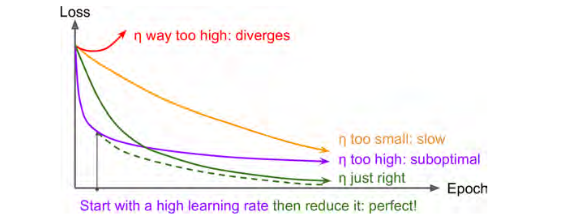

Postoji cijeli niz metoda planiranja stope učenja, ali jedna od najkorištenijih jest **Exponential scheduling**. 

Kod Exponential Scheduling-a idea jest da se stopa učenja $\alpha$ u svakoj itaraciji mijenja po sljedećoj formuli:

$$\alpha(t) = \alpha_0 \cdot 10^{-\frac{t}{r}}$$

Kao što vidimo u formuli je potrebno zadati inicijalnu stopu učenja $\alpha_0$ i broj koraka $r$. Također mehanizam je vrlo jednostavan, svakih $r$ koraka stopa učenja će se spustiti za faktor $10$. 

Konačni zaključak prilikom planiranja stope učenja jest da svaki optimizacijski algoritam može imati koristi od iste.

## Rezultati na MNIST setu podataka - klasifikacija

U skripti *Mnist Test* implementirana je neuronska mreža koja je testirana sa trening setu od $55000$ slika i validirana na setu od $5000$ slika. Testirani su svi optimizacijski algoritmi te se njihovi grafovi (svaki algoritam se testirao 100 puta sa ispremješanim podacima za test set podataka i validacijski set podataka):

GD | ADAGRAD | Momentum 
:-:|:-------:|:--------:
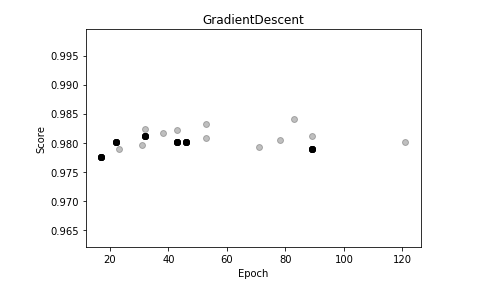 | 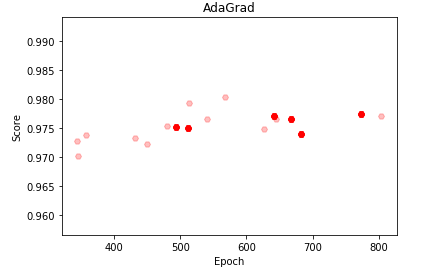| 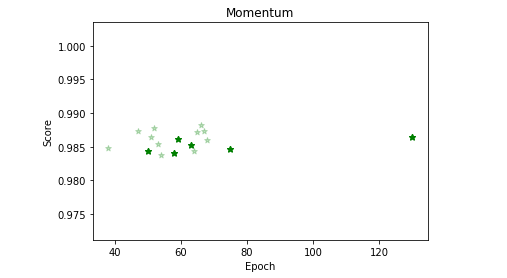


RMSProp | Adam | All
:------:|:----:|:----:
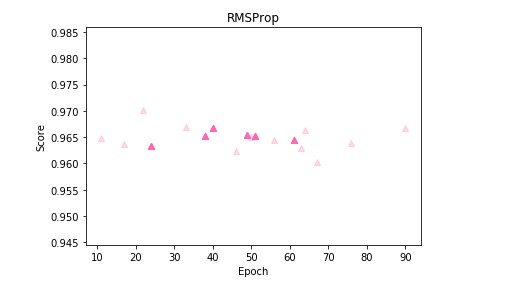 | 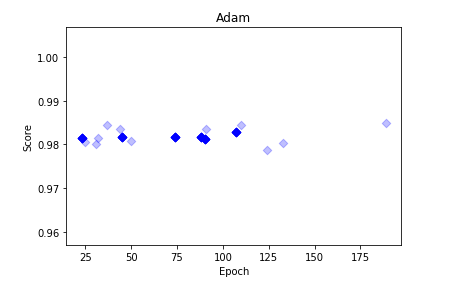 | 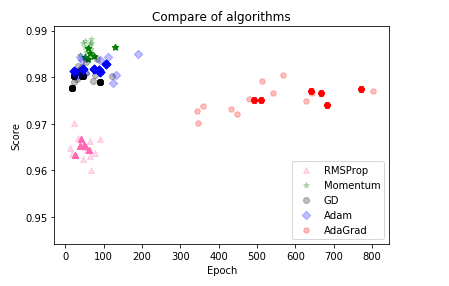


## Rezultati na Housing setu podataka - regresija

U skripti *Housing Test* implementirana je neuronska mreža koja je testirana sa trening setu od $15480$ slika i validirana na setu od $5160$ slika. Testirani su svi optimizacijski algoritmi te se njihovi grafovi (svaki algoritam se testirao 100 puta sa ispremješanim podacima za test set podataka i validacijski set podataka):

GD | ADAGRAD | Momentum 
:-:|:-------:|:--------:
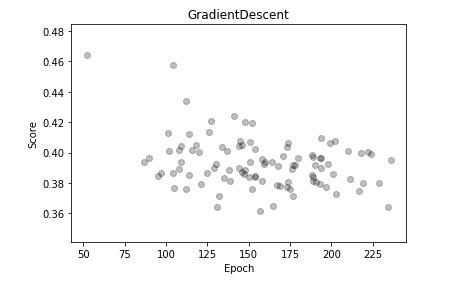|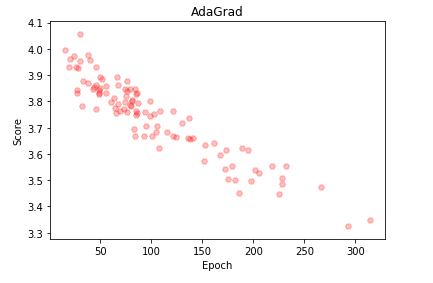|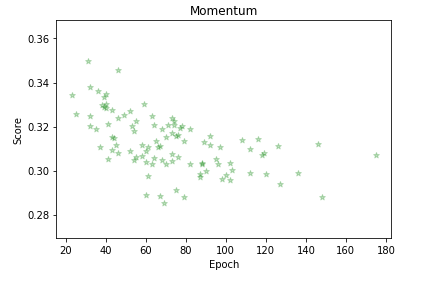


RMSProp | Adam | All
:------:|:----:|:----:
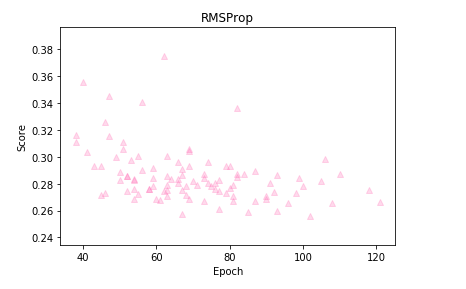|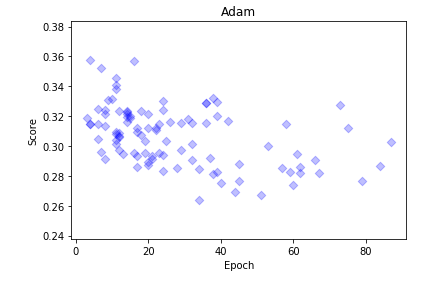|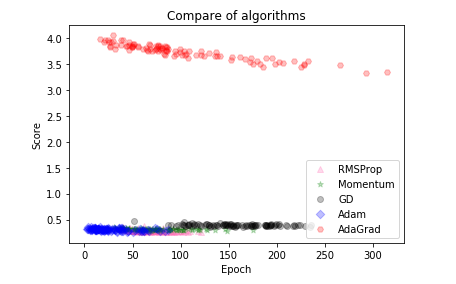


## Usporedba rezultata
